# Bike Sharing Assignment

## Problem Statement:

   A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

   A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

   In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

   They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

`The company wants to know:`

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Assumptions for Linear Regression model: 

- Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.
- Homoscedasticity: The residuals have constant variance at every level of x.
- Normality: The residuals of the model are normally distributed.
- No or little multicollinearity

# 1. Reading and Understanding the Data

### 1.1 Importing libraries and Files

In [1279]:
# Importing the warnings 

import warnings

warnings.filterwarnings('ignore')

In [1280]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1281]:
# Reading the data

df_bike = pd.read_csv('day.csv')

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_column', 50)
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.2 Data types

In [1282]:
# Determining the shape of the datset

df_bike.shape

(730, 16)

In [1283]:
# Checking the column-wise info of the dataframe

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1284]:
# Checking for missing values

df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#####  Dataset contains `'0'` missing values.

In [1285]:
# Checking the summary for the numeric columns 

df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 1.2.1 Rename the columns 

In [1286]:
df_bike.rename(columns = {'dteday':'date', 'yr': 'year', 'mnth': 'month',
                          'weathersit':'weather_condition','hum': 'humidity', 'atemp': 'feeling_temp'}, inplace = True)
df_bike.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,feeling_temp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1287]:
# Updating position of target variable 'cnt' for ease of model building.

df_bike.insert(0,'cnt', df_bike.pop('cnt'))
df_bike.head()

,cnt,instant,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,feeling_temp,humidity,windspeed,casual,registered
0,985,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654
1,801,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670
2,1349,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,1562,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,1600,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518


### 1.2.1 Dropping column `'instant'` which is `record index`

In [1288]:
df_bike = df_bike.drop('instant',axis = 1)

df_bike.head()

,cnt,date,season,year,month,holiday,weekday,workingday,weather_condition,temp,feeling_temp,humidity,windspeed,casual,registered
0,985,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654
1,801,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670
2,1349,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,1562,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,1600,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518


### 1.2.2 Dropping column `date` as `year` & `month` columns `present`

In [1289]:
df_bike = df_bike.drop('date',axis = 1)

df_bike.head()

,cnt,season,year,month,holiday,weekday,workingday,weather_condition,temp,feeling_temp,humidity,windspeed,casual,registered
0,985,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654
1,801,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670
2,1349,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,1562,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,1600,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518


###  1.2.3 Correcting the `season` & `weathersit` w.r.t. `month`

- From columns 'dteday' we can see that season, defined `1: spring, 2: summer, 3: fall, 4: winter `are incorrect w.r.t `month`:

    - Spring runs from March 1 to May 31;
    - Summer runs from June 1 to August 31;
    - Fall (autumn) runs from September 1 to November 30; and
    - Winter runs from December 1 to February 28 (February 29 in a leap year).
    
    

- From data dictionary we get know that, weathersit is dependent on season's variable. 
With update of season variable we will updating `weathersit `variable w.r.t. `month`

    - Spring : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - Summer : Clear, Few Clouds, Partly cloudy
    - Fall : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Lighter Rains + Scattered Clouds
    - Winter : Heavy Rain + Ice Pallets + Thunderstorm + SCattered Clouds, Light Rain clouds.

In [1290]:
# Correcting the season variable w.r.t. month variable

def updated(x):
    if (x >= 3) & (x <= 5):
        return 'spring' # 1: Spring
    
    elif (x >= 6) & (x <= 8):
        return 'summer' # 2: Summer 
    
    elif (x >= 9) & (x <= 11):
        return 'fall' # 3 : Fall
    
    else:
        return 'winter' # 4: Winter
    
df_bike['season_N'] = df_bike['month'].apply(updated)

df_bike.head()

,cnt,season,year,month,holiday,weekday,workingday,weather_condition,temp,feeling_temp,humidity,windspeed,casual,registered,season_N
0,985,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,winter
1,801,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,winter
2,1349,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,winter
3,1562,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,winter
4,1600,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,winter


In [1291]:
# Correcting the weathersit variable w.r.t. month variable

def updated_1(x):
    if (x >= 3) & (x <= 5):
        return 'Mist' # 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    
    elif (x >= 6) & (x <= 8):
        return 'Clear' # 1: Clear, Few Clouds, Partly cloudy
    
    elif (x >= 9) & (x <= 11):
        return 'Light_snow' # 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Lighter Rains + Scattered Clouds
    
    else:
        return 'Heavy_Rain' # 4: Heavy Rain + Ice Pallets + Thunderstorm + SCattered Clouds, Light Rain clouds.
    
df_bike['weather_cond_N'] = df_bike['month'].apply(updated_1)

df_bike.head()

,cnt,season,year,month,holiday,weekday,workingday,weather_condition,temp,feeling_temp,humidity,windspeed,casual,registered,season_N,weather_cond_N
0,985,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,winter,Heavy_Rain
1,801,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,winter,Heavy_Rain
2,1349,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,winter,Heavy_Rain
3,1562,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,winter,Heavy_Rain
4,1600,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,winter,Heavy_Rain


In [1292]:
# Dropping season & wethersit columns

df_bike.drop(['season', 'weather_condition'], axis = 1, inplace = True)

df_bike.head()

,cnt,year,month,holiday,weekday,workingday,temp,feeling_temp,humidity,windspeed,casual,registered,season_N,weather_cond_N
0,985,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,winter,Heavy_Rain
1,801,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,winter,Heavy_Rain
2,1349,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,winter,Heavy_Rain
3,1562,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,winter,Heavy_Rain
4,1600,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,winter,Heavy_Rain


### 1.2.4 Converting categorical variable `month` into strings

In [1293]:
# Updating the month ranging from 1-12 into strings as Jan- Dec

def update_3(x):
    if x == 1:
        return 'Jan'
    elif x == 2:
        return 'Feb'
    elif x == 3:
        return 'Mar'
    elif x == 4:
        return 'Apr'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'Jun'
    elif x == 7:
        return 'Jul'
    elif x == 8:
        return 'Aug'
    elif x == 9:
        return 'Sep'
    elif x == 10:
        return 'Oct'
    elif x == 11:
        return 'Nov'
    else:
        return 'Dec'
    
df_bike['month'] = df_bike['month'].apply(update_3)

df_bike.head()

,cnt,year,month,holiday,weekday,workingday,temp,feeling_temp,humidity,windspeed,casual,registered,season_N,weather_cond_N
0,985,0,Jan,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,winter,Heavy_Rain
1,801,0,Jan,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,winter,Heavy_Rain
2,1349,0,Jan,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,winter,Heavy_Rain
3,1562,0,Jan,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,winter,Heavy_Rain
4,1600,0,Jan,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,winter,Heavy_Rain


### 1.2.4 Converting categorical variable `weekday` into strings

In [1294]:
# Updating the weekday ranging from 0-6 into strings as Sunday to Saturday

def update_3(x):
    if x == 0:
        return 'Sun'
    elif x == 1:
        return 'Mon'
    elif x == 2:
        return 'Tues'
    elif x == 3:
        return 'Wed'
    elif x == 4:
        return 'Thus'
    elif x == 5:
        return 'Fri'
    else:
        return 'Sat'
    
df_bike['weekday'] = df_bike['weekday'].apply(update_3)

df_bike.head()

,cnt,year,month,holiday,weekday,workingday,temp,feeling_temp,humidity,windspeed,casual,registered,season_N,weather_cond_N
0,985,0,Jan,0,Mon,1,14.110847,18.18125,80.5833,10.749882,331,654,winter,Heavy_Rain
1,801,0,Jan,0,Tues,1,14.902598,17.68695,69.6087,16.652113,131,670,winter,Heavy_Rain
2,1349,0,Jan,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,1229,winter,Heavy_Rain
3,1562,0,Jan,0,Thus,1,8.200000,10.60610,59.0435,10.739832,108,1454,winter,Heavy_Rain
4,1600,0,Jan,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,1518,winter,Heavy_Rain


# 2. Visualising data

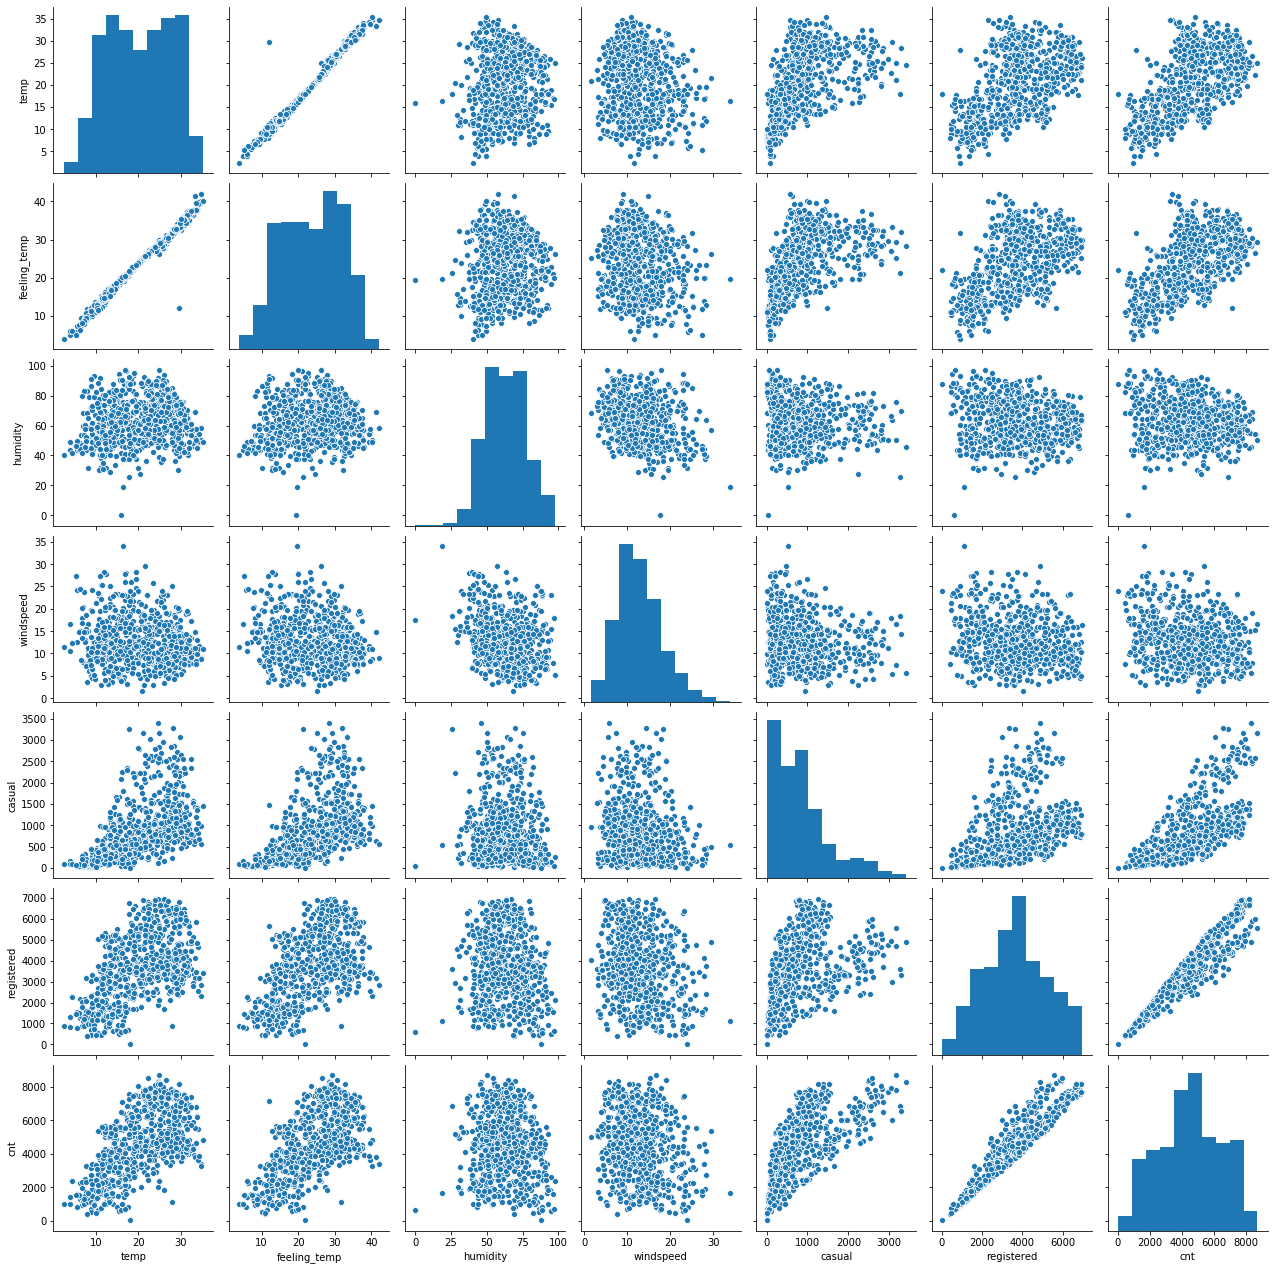

In [1295]:
sns.pairplot(df_bike, x_vars = ['temp','feeling_temp','humidity','windspeed','casual','registered', 'cnt'], 
                      y_vars = ['temp','feeling_temp','humidity','windspeed','casual','registered', 'cnt'])
plt.show()

### Inferences:

- Fom target variable `'cnt'` we can see good linear relationship with variable `'registered'` as  well as `'casual'`.
'cnt' columns shows total number of bike rentals, including both casual and registered.
- For Variable `'humidity'` & `'windspeed'` points are scatterd w.r.t. variable `'cnt'`
- Variables `'temp'` & `'feeling_temp'` have almost same relationship with target variables `'cnt'`

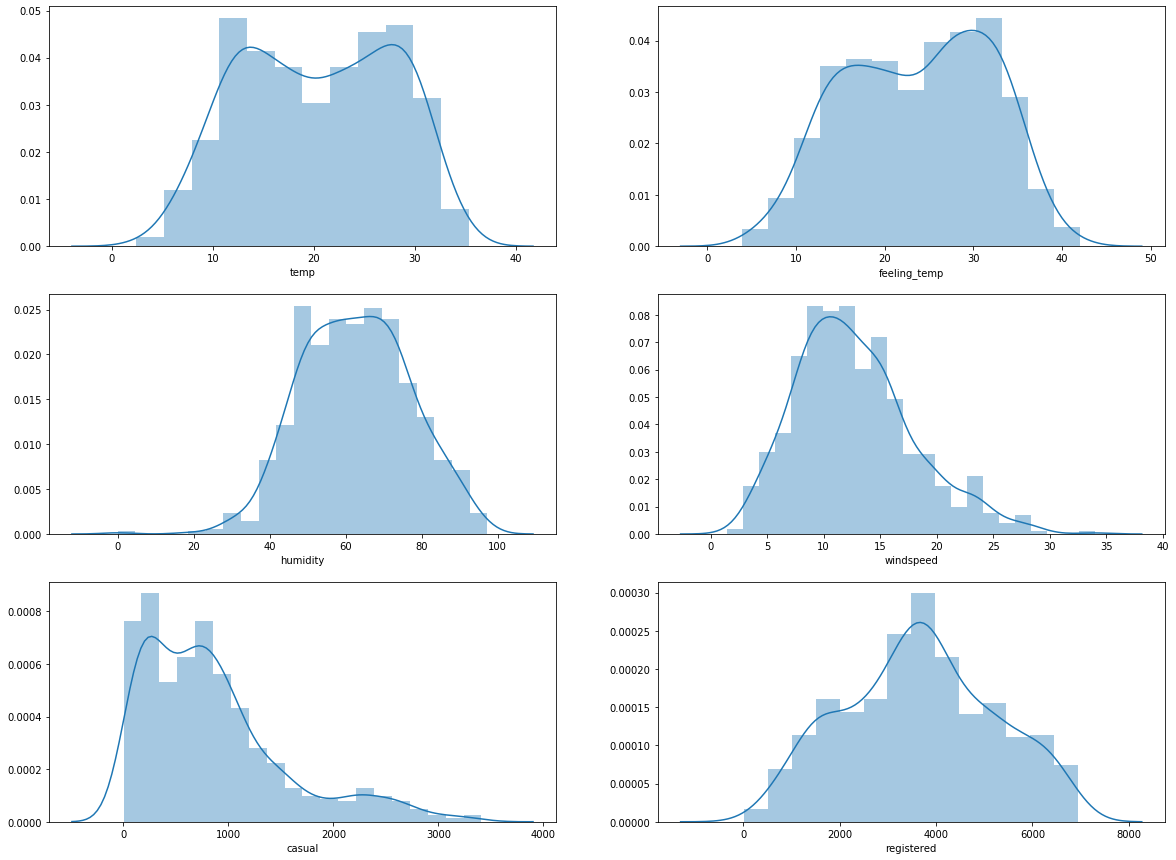

In [1296]:
# Checking the distribution of values in numerical columns.

plt.figure(figsize = (20,15))
plt.subplot(3,2,1)
sns.distplot(df_bike['temp'])

plt.subplot(3,2,2)
sns.distplot(df_bike['feeling_temp'])

plt.subplot(3,2,3)
sns.distplot(df_bike['humidity'])

plt.subplot(3,2,4)
sns.distplot(df_bike['windspeed'])

plt.subplot(3,2,5)
sns.distplot(df_bike['casual'])

plt.subplot(3,2,6)
sns.distplot(df_bike['registered'])

plt.show()

### Inferences:

- We can see the distribution of temp variable is high in between 25-30 Degree celsius.
- Feeling temp is highly distributed in between 30-35 Degree celsius.
- Humidity is distributed between 45-75.
- Windspeed is following normal distribution with mean in between 7-13.
- Casual is highly distributed in between 0-1000 count.
- Registered is following normal distribution around 3500-4000 count.

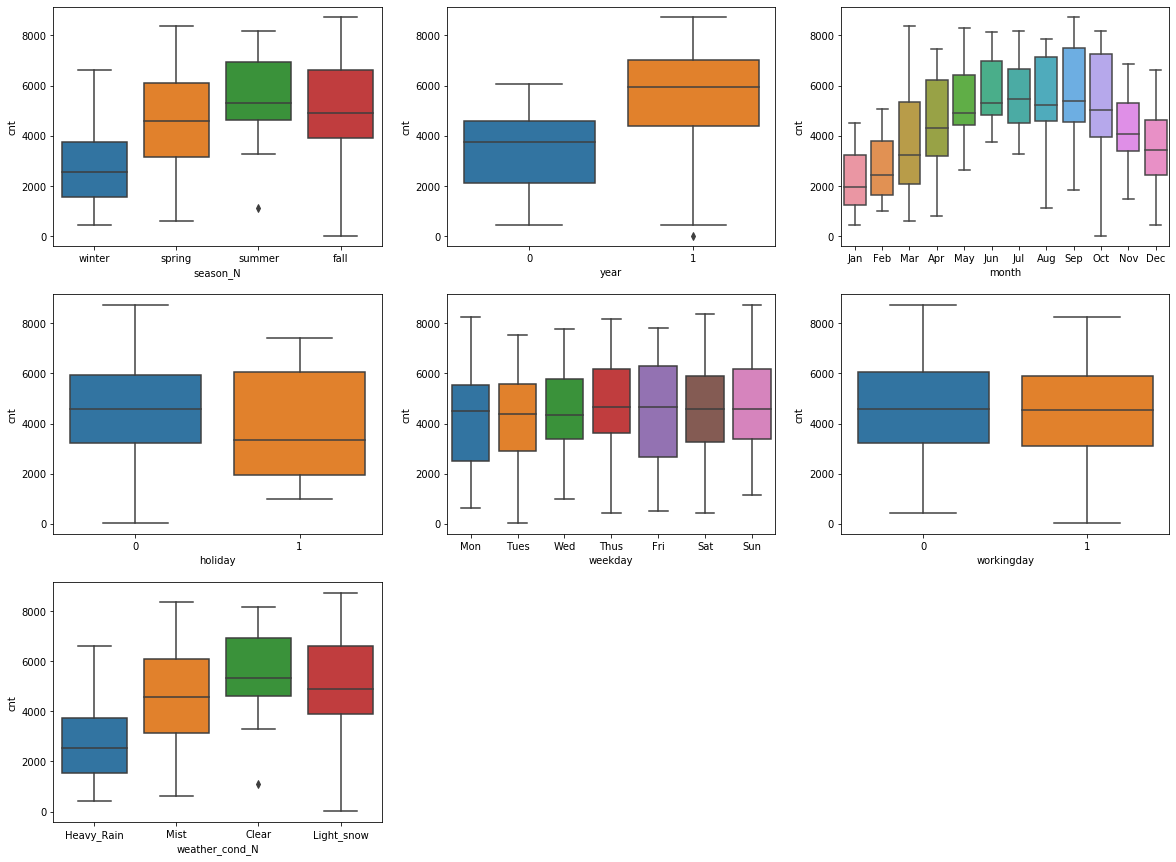

In [1297]:
# Visualising the Categorical Variables

plt.figure(figsize = (20,15))

plt.subplot(3,3,1)
sns.boxplot(x = 'season_N', y = 'cnt', data = df_bike)

plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = df_bike)

plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = df_bike)

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike)

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike)

plt.subplot(3,3,7)
sns.boxplot(x = 'weather_cond_N', y = 'cnt', data = df_bike)

plt.show()

### Inferences:

- From `'season_N'` variable we can see the `Median` is highest for `Summer`
- Count is increased in variable `'year'` in `1- 2019`
- Count is seen increased in for months `6,7,8,9,10` i.e. June, July, Augest, September, October
- It can be seen from boxplot that peole `use less` bike sharing on hoildays.
- Use of Bike sharing or count is seen approximately `same for weekday`.
- For working day or not count is seen approximately unaffected.
- Population is seen more comfortable in `Clear` from 'weather_cond_N' i.e. Clear, Few clouds, Partly cloudy.

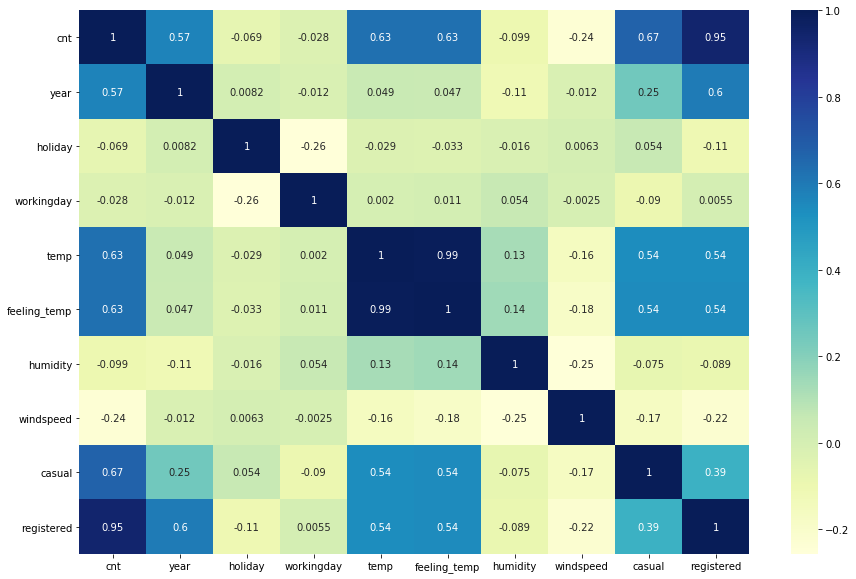

In [1298]:
# Heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(df_bike.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### Inferences:

- We have high correlation between registered and count is 0.95.
- Also casual is highly correlated to count as 0.67.
- We can see the high correlation between temp & feeling_temp as 0.99.

# 3. Preparing the data for modelling

### 3.1 Categorical variables to dummy variables for `season_N` column

In [1299]:
# Creating dummy variable for `season_N` variable

dummy_1 = pd.get_dummies(df_bike['season_N'])
dummy_1.head()

,fall,spring,summer,winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


Now, we dont need four columns. We can drop the first column,  as season it can be identified with last three columns, where,
-  `000` corresponds to `fall`
-  `100` corresponds to `spring`
-  `010` corresponds to `summer`
-  `001` corresponds to `winter`

In [1300]:
# dropping a redundant dummy variable

dummy_1 = pd.get_dummies(df_bike['season_N'], drop_first = True)
dummy_1.head()

,spring,summer,winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [1301]:
# Concat the dummy dataframe with the original one

df_bike = pd.concat([df_bike, dummy_1], axis = 1)
df_bike.head()

,cnt,year,month,holiday,weekday,workingday,temp,feeling_temp,humidity,windspeed,casual,registered,season_N,weather_cond_N,spring,summer,winter
0,985,0,Jan,0,Mon,1,14.110847,18.18125,80.5833,10.749882,331,654,winter,Heavy_Rain,0,0,1
1,801,0,Jan,0,Tues,1,14.902598,17.68695,69.6087,16.652113,131,670,winter,Heavy_Rain,0,0,1
2,1349,0,Jan,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,1229,winter,Heavy_Rain,0,0,1
3,1562,0,Jan,0,Thus,1,8.200000,10.60610,59.0435,10.739832,108,1454,winter,Heavy_Rain,0,0,1
4,1600,0,Jan,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,1518,winter,Heavy_Rain,0,0,1


In [1302]:
# Dropping the not required column

df_bike = df_bike.drop('season_N', axis = 1)
df_bike.head()

,cnt,year,month,holiday,weekday,workingday,temp,feeling_temp,humidity,windspeed,casual,registered,weather_cond_N,spring,summer,winter
0,985,0,Jan,0,Mon,1,14.110847,18.18125,80.5833,10.749882,331,654,Heavy_Rain,0,0,1
1,801,0,Jan,0,Tues,1,14.902598,17.68695,69.6087,16.652113,131,670,Heavy_Rain,0,0,1
2,1349,0,Jan,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,1229,Heavy_Rain,0,0,1
3,1562,0,Jan,0,Thus,1,8.200000,10.60610,59.0435,10.739832,108,1454,Heavy_Rain,0,0,1
4,1600,0,Jan,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,1518,Heavy_Rain,0,0,1


### 3.2 Categorical variables to dummy variables for `weathersit_N` column

In [1303]:
dummy_2 = pd.get_dummies(df_bike['weather_cond_N'])
dummy_2.head()

,Clear,Heavy_Rain,Light_snow,Mist
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, we dont need four columns. We can drop the first column,  as weather it can be identified with last three columns, where,
-  `000` corresponds to `Clear`
-  `100` corresponds to `Heavy_Rain`
-  `010` corresponds to `Light_snow`
-  `001` corresponds to `Mist`

In [1304]:
# dropping a redundant dummy variable

dummy_2 = pd.get_dummies(df_bike['weather_cond_N'], drop_first = True)
dummy_2.head()

,Heavy_Rain,Light_snow,Mist
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [1305]:
# Concat the dummy dataframe with the original one

df_bike = pd.concat([df_bike, dummy_2], axis = 1)
df_bike.head()

,cnt,year,month,holiday,weekday,workingday,temp,feeling_temp,humidity,windspeed,casual,registered,weather_cond_N,spring,summer,winter,Heavy_Rain,Light_snow,Mist
0,985,0,Jan,0,Mon,1,14.110847,18.18125,80.5833,10.749882,331,654,Heavy_Rain,0,0,1,1,0,0
1,801,0,Jan,0,Tues,1,14.902598,17.68695,69.6087,16.652113,131,670,Heavy_Rain,0,0,1,1,0,0
2,1349,0,Jan,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,1229,Heavy_Rain,0,0,1,1,0,0
3,1562,0,Jan,0,Thus,1,8.200000,10.60610,59.0435,10.739832,108,1454,Heavy_Rain,0,0,1,1,0,0
4,1600,0,Jan,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,1518,Heavy_Rain,0,0,1,1,0,0


In [1306]:
# Dropping the not required column

df_bike = df_bike.drop('weather_cond_N', axis = 1)
df_bike.head()

,cnt,year,month,holiday,weekday,workingday,temp,feeling_temp,humidity,windspeed,casual,registered,spring,summer,winter,Heavy_Rain,Light_snow,Mist
0,985,0,Jan,0,Mon,1,14.110847,18.18125,80.5833,10.749882,331,654,0,0,1,1,0,0
1,801,0,Jan,0,Tues,1,14.902598,17.68695,69.6087,16.652113,131,670,0,0,1,1,0,0
2,1349,0,Jan,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,1229,0,0,1,1,0,0
3,1562,0,Jan,0,Thus,1,8.200000,10.60610,59.0435,10.739832,108,1454,0,0,1,1,0,0
4,1600,0,Jan,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,1518,0,0,1,1,0,0


### 3.3 Categorical variables to dummy variables for `weekday` column

In [1307]:
dummy_3 = pd.get_dummies(df_bike['weekday'])
dummy_3.head()

,Fri,Mon,Sat,Sun,Thus,Tues,Wed
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


Now, we dont need seven columns. We can drop the first column,  as weather it can be identified with last six columns, where,
-  `000000` corresponds to `Friday`
-  `100000` corresponds to `Monday`
-  `010000` corresponds to `Saturday`
-  `001000` corresponds to `Sunday`
-  `000100` corresponds to `Thursday`
-  `000010` corresponds to `Tuesday`
-  `000001` corresponds to `wednesday`


In [1308]:
dummy_3 = pd.get_dummies(df_bike['weekday'], drop_first = True)
dummy_3.head()

,Mon,Sat,Sun,Thus,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [1309]:
# Concat the dummy dataframe with the original one

df_bike = pd.concat([df_bike, dummy_3], axis = 1)
df_bike.head()

,cnt,year,month,holiday,weekday,workingday,temp,feeling_temp,humidity,windspeed,casual,registered,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed
0,985,0,Jan,0,Mon,1,14.110847,18.18125,80.5833,10.749882,331,654,0,0,1,1,0,0,1,0,0,0,0,0
1,801,0,Jan,0,Tues,1,14.902598,17.68695,69.6087,16.652113,131,670,0,0,1,1,0,0,0,0,0,0,1,0
2,1349,0,Jan,0,Wed,1,8.050924,9.47025,43.7273,16.636703,120,1229,0,0,1,1,0,0,0,0,0,0,0,1
3,1562,0,Jan,0,Thus,1,8.200000,10.60610,59.0435,10.739832,108,1454,0,0,1,1,0,0,0,0,0,1,0,0
4,1600,0,Jan,0,Fri,1,9.305237,11.46350,43.6957,12.522300,82,1518,0,0,1,1,0,0,0,0,0,0,0,0


In [1310]:
# Dropping the not required column

df_bike = df_bike.drop('weekday', axis = 1)
df_bike.head()

,cnt,year,month,holiday,workingday,temp,feeling_temp,humidity,windspeed,casual,registered,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed
0,985,0,Jan,0,1,14.110847,18.18125,80.5833,10.749882,331,654,0,0,1,1,0,0,1,0,0,0,0,0
1,801,0,Jan,0,1,14.902598,17.68695,69.6087,16.652113,131,670,0,0,1,1,0,0,0,0,0,0,1,0
2,1349,0,Jan,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,0,0,1,1,0,0,0,0,0,0,0,1
3,1562,0,Jan,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,0,0,1,1,0,0,0,0,0,1,0,0
4,1600,0,Jan,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,0,0,1,1,0,0,0,0,0,0,0,0


### 3.4 Categorical variables to dummy variables for `month` column

In [1311]:
dummy_4 = pd.get_dummies(df_bike['month'])
dummy_4.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


Now, we dont need 12 columns. We can drop the first column,  as weather it can be identified with last 11 columns, where,

-  `00000000000` corresponds to `Apr`
-  `10000000000` corresponds to `Aug`
-  `01000000000` corresponds to `Dec`
-  `00100000000` corresponds to `Feb`
-  `00010000000` corresponds to `Jan`
-  `00001000000` corresponds to `Jul`
-  `00000100000` corresponds to `Jun`
-  `00000010000` corresponds to `Mar`
-  `00000001000` corresponds to `May`
-  `00000000100` corresponds to `Nov`
-  `00000000010` corresponds to `Oct`
-  `00000000001` corresponds to `Sep`

In [1312]:
dummy_4 = pd.get_dummies(df_bike['month'], drop_first = True)
dummy_4.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [1313]:
# Concat the dummy dataframe with the original one

df_bike = pd.concat([df_bike, dummy_4], axis = 1)
df_bike.head()

,cnt,year,month,holiday,workingday,temp,feeling_temp,humidity,windspeed,casual,registered,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,985,0,Jan,0,1,14.110847,18.18125,80.5833,10.749882,331,654,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,801,0,Jan,0,1,14.902598,17.68695,69.6087,16.652113,131,670,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1349,0,Jan,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,1562,0,Jan,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1600,0,Jan,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1314]:
# Dropping the not required column

df_bike = df_bike.drop('month', axis = 1)
df_bike.head()

,cnt,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,casual,registered,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,985,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,801,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1349,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,1562,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1600,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Note:
- Here, we are not updating year, holiday & working day into strings as they are having only 2 levels.

### 3.5 Removing 'registered' & 'casual' columns 

- Target variable 'cnt' is count of both 'casual' & 'registered' bikes. So Both variables will have high correlation with target variable. So removing them for only target variable 'cnt'.

In [1315]:
# Dropping columnns
df_bike = df_bike.drop(['registered', 'casual'], axis = 1)
df_bike.head()

,cnt,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,985,0,0,1,14.110847,18.18125,80.5833,10.749882,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,801,0,0,1,14.902598,17.68695,69.6087,16.652113,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1349,0,0,1,8.050924,9.47025,43.7273,16.636703,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,1562,0,0,1,8.200000,10.60610,59.0435,10.739832,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1600,0,0,1,9.305237,11.46350,43.6957,12.522300,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1316]:
# Updating position of target variable 'cnt' for ease of model building.

df_bike.insert(0,'cnt', df_bike.pop('cnt'))
df_bike.head()

,cnt,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,985,0,0,1,14.110847,18.18125,80.5833,10.749882,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,801,0,0,1,14.902598,17.68695,69.6087,16.652113,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1349,0,0,1,8.050924,9.47025,43.7273,16.636703,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,1562,0,0,1,8.200000,10.60610,59.0435,10.739832,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1600,0,0,1,9.305237,11.46350,43.6957,12.522300,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### 4. Splitting Dataset into train dataset & test dataset

In [1317]:
# Importing Sklearn library for train_test_split

import sklearn
from sklearn.model_selection import train_test_split

In [1318]:
# Splitting dataset into train and test with train size 0.3

df_train, df_test = train_test_split(df_bike, train_size = 0.7, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [1319]:
# Checking numerical columns for scaling.

df_train.describe()

,cnt,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,4485.337255,0.507843,0.025490,0.711765,20.108257,23.500287,63.123710,12.834912,0.260784,0.24902,0.239216,0.239216,0.250980,0.260784,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,1950.666077,0.500429,0.157763,0.453386,7.431626,8.090963,14.153170,5.292031,0.439494,0.43287,0.427024,0.427024,0.434003,0.439494,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,22.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3120.000000,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4530.000000,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5973.500000,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,1.000000,0.00000,0.000000,0.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8714.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.1 Rescaling the Features

Rescaling the variables so that they have a comparable scale. 
By using,
- Min-Max scaling (normnalization) : between 0 & 1

normalization : `(x - x_min)/(x_max - x_min)`

where, x is the vector or value in column

In [1320]:
# Importing Sklearn library for MinMaxScaler

from sklearn.preprocessing import MinMaxScaler


In [1321]:
# 1. Instantiate an object

scaler = MinMaxScaler()

# Create a list of numeric vars

num_vars = ['temp', 'feeling_temp','humidity','windspeed','cnt']

# 2. Fit_transform on data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,cnt,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,0.827658,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426,0.465255,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,0.204096,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,0.482973,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0.191095,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1322]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           510 non-null    float64
 1   year          510 non-null    int64  
 2   holiday       510 non-null    int64  
 3   workingday    510 non-null    int64  
 4   temp          510 non-null    float64
 5   feeling_temp  510 non-null    float64
 6   humidity      510 non-null    float64
 7   windspeed     510 non-null    float64
 8   spring        510 non-null    uint8  
 9   summer        510 non-null    uint8  
 10  winter        510 non-null    uint8  
 11  Heavy_Rain    510 non-null    uint8  
 12  Light_snow    510 non-null    uint8  
 13  Mist          510 non-null    uint8  
 14  Mon           510 non-null    uint8  
 15  Sat           510 non-null    uint8  
 16  Sun           510 non-null    uint8  
 17  Thus          510 non-null    uint8  
 18  Tues          510 non-null  

In [1323]:
df_train.describe()

,cnt,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513499,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.260784,0.24902,0.239216,0.239216,0.250980,0.260784,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.224421,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.439494,0.43287,0.427024,0.427024,0.434003,0.439494,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.518638,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.684710,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,1.000000,0.00000,0.000000,0.000000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.2 Checking correlation coefficients for df_train

In [1324]:
# Checking correlation between df_train 

df_train.corr()

,cnt,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
cnt,1.000000,0.591433,-0.095948,-0.009071,0.645048,0.647944,-0.058793,-0.253038,-0.007228,0.372323,-0.503091,-0.503091,0.130969,-0.007228,-0.071013,0.012712,0.031474,0.110734,-0.018672,-0.020949,0.227578,-0.143546,-0.270351,-0.378296,0.158087,0.195411,-0.137465,0.113276,-0.048002,0.055558,0.201639
year,0.591433,1.000000,-0.014980,-0.003005,0.108054,0.104971,-0.084061,-0.000439,0.013014,0.058987,-0.045572,-0.045572,-0.027173,0.013014,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,0.054774,-0.040049,-0.019916,-0.011794,0.017623,0.017623,-0.005172,-0.025933,-0.018790,-0.025933,0.002574
holiday,-0.095948,-0.014980,1.000000,-0.254149,-0.066405,-0.070760,-0.029224,0.017458,-0.067726,-0.093131,0.055123,0.055123,0.107235,-0.067726,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-0.052728,-0.004302,0.056524,0.037412,-0.046539,-0.046539,-0.053321,-0.049076,0.127543,-0.004302,0.043692
workingday,-0.009071,-0.003005,-0.254149,1.000000,-0.007143,0.004316,0.021192,-0.002071,0.013166,0.006065,-0.028771,-0.028771,0.008927,0.013166,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,-0.012875,-0.025020,-0.003471,-0.015711,-0.012361,0.036508,-0.008563,0.021720,0.025939,0.021720,-0.034746
temp,0.645048,0.108054,-0.066405,-0.007143,1.000000,0.989539,0.155252,-0.187281,-0.054794,0.703173,-0.648229,-0.648229,-0.008045,-0.054794,-0.038042,0.024972,0.006540,0.074647,-0.002284,-0.044303,0.387176,-0.273091,-0.296213,-0.446941,0.413678,0.301219,-0.179941,0.155168,-0.194994,-0.018286,0.207212
feeling_temp,0.647944,0.104971,-0.070760,0.004316,0.989539,1.000000,0.169341,-0.215108,-0.043496,0.675805,-0.645799,-0.645799,0.005419,-0.043496,-0.037163,0.011785,0.006044,0.078295,0.002480,-0.041378,0.359727,-0.262072,-0.299686,-0.451026,0.406832,0.293970,-0.178698,0.161665,-0.185918,-0.005162,0.205900
humidity,-0.058793,-0.084061,-0.029224,0.021192,0.155252,0.169341,1.000000,-0.267126,-0.064717,-0.055572,-0.086167,-0.086167,0.205744,-0.064717,-0.030833,0.002489,-0.027699,-0.057323,0.033232,0.028329,0.052949,0.057615,-0.129780,-0.071906,-0.054070,-0.095077,-0.111040,0.145409,0.004676,0.167153,0.152439
windspeed,-0.253038,-0.000439,0.017458,-0.002071,-0.187281,-0.215108,-0.267126,1.000000,0.186657,-0.148946,0.042259,0.042259,-0.082040,0.186657,0.035097,-0.016545,0.018007,-0.021779,0.035326,-0.055798,-0.111460,-0.061179,0.132936,0.006582,-0.085671,-0.033103,0.141944,-0.034342,0.009742,-0.018546,-0.121930
spring,-0.007228,0.013014,-0.067726,0.013166,-0.054794,-0.043496,-0.064717,0.186657,1.000000,-0.342025,-0.333057,-0.333057,-0.343818,1.000000,-0.044459,0.010487,-0.003308,0.063284,-0.004233,-0.012980,-0.193643,-0.180232,-0.158742,-0.184771,-0.170914,-0.170914,0.555074,0.510882,-0.182511,-0.180232,-0.175615
summer,0.372323,0.058987,-0.093131,0.006065,0.703173,0.675805,-0.055572,-0.148946,-0.342025,1.000000,-0.322899,-0.322899,-0.333331,-0.342025,0.029167,0.007628,0.020669,0.023584,-0.017933,-0.042186,0.566168,-0.174734,-0.153900,-0.179136,0.499712,0.499712,-0.189849,-0.174734,-0.176944,-0.174734,-0.170258


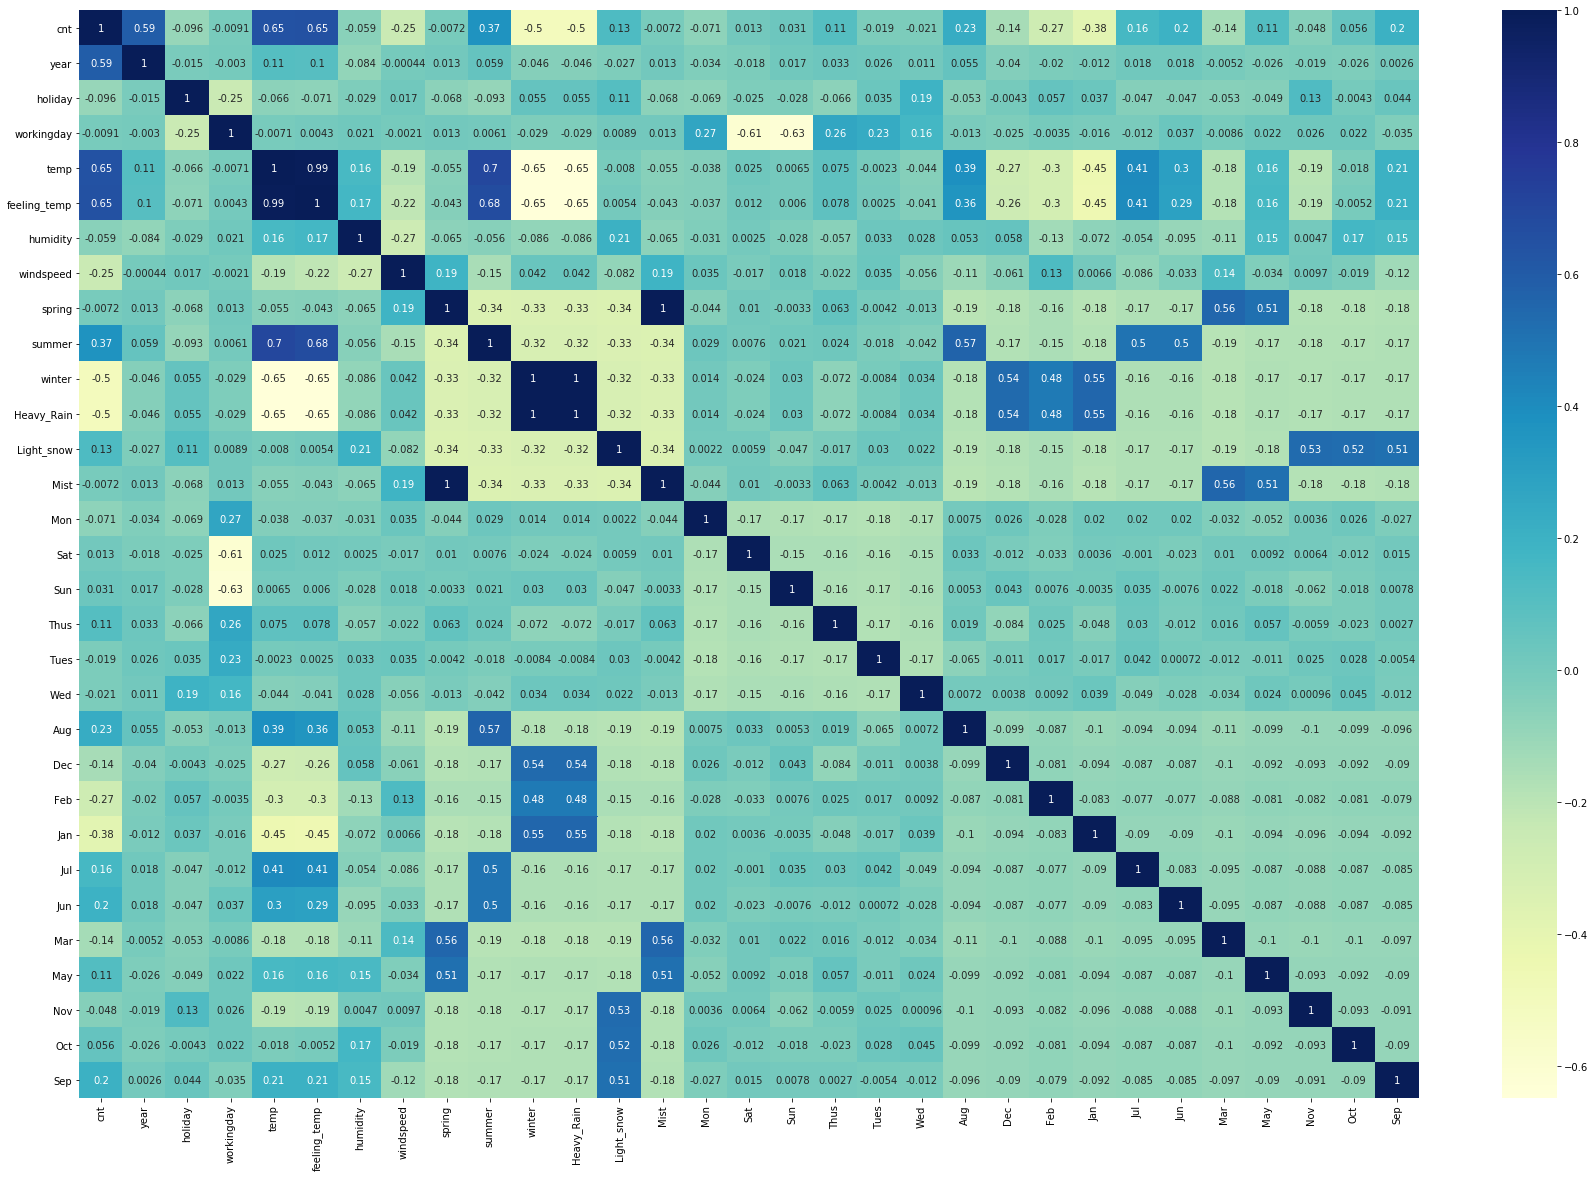

In [1325]:
# Heatmap

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### Inferences:

- For variable `feeling_temp` & `temp`  have same correlation with `cnt` as `0.65` and with each other as `0.99`. 
- For variable `year` have correlation with target variable as `0.59`.
- Followed by year we have `summer` with correlation positive coef as `0.37` and `month` with correlation positive coef as `0.28`
- `winter` & `heavy_Rain` have negative correlationship with target variable 'cnt' as `0.5031` 

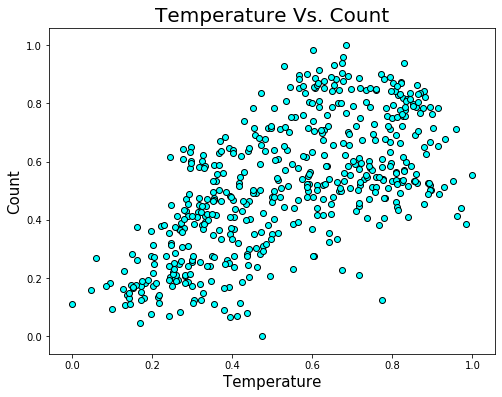

In [1326]:
#From Heatmap we have seen the 'temp' variable is correlated to 'cnt' most. 
#plotting scatter plot for tenp vs cnt

plt.figure(figsize=[8, 6])
plt.scatter(df_train['temp'], df_train['cnt'], color = 'cyan', edgecolor = 'Black')
plt.title('Temperature Vs. Count', Fontsize = 20)
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

### 4.3 Defining X_train & y_train for model building

In [1327]:
# Defining the X_train, y_train

y_train = df_train.pop('cnt')
X_train = df_train

In [1328]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [1329]:
X_train.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 5. Building a linear model

Fitting a regression line through the training data using `statsmodels`.
by default, statsmodels fit a regression line passing through the origin. So adding a constant to explicitly fit using `sm.add_constant(X)`.


In [1330]:
# Importng statsmodels library for api

import statsmodels.api as sm

### 5.1 Linear model for X_train

In [1331]:
# Adding a constant 
X_train_lm = sm.add_constant(X_train[['temp']])

X_train_lm.head()

,const,temp
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666
111,1.0,0.345824


In [1332]:
# Create a first fitted model
lr = sm.OLS(y_train,X_train_lm).fit()

lr

In [1333]:
# Checking parameters of model

lr.params

const    0.169031
temp     0.640944
dtype: float64

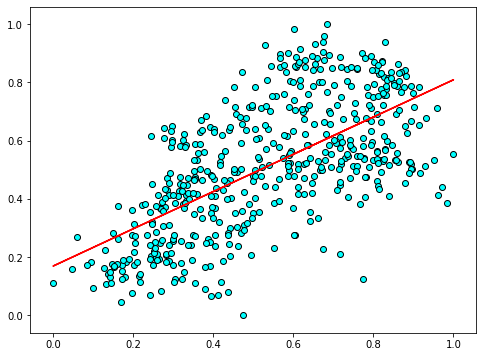

In [1334]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize=[8, 6])
plt.scatter(X_train_lm.iloc[:, 1].values, y_train, color = 'cyan', edgecolor = 'Black')
plt.plot(X_train_lm.iloc[:, 1].values, 0.169 + 0.640*X_train_lm.iloc[:, 1].values, 'r')
plt.show()

In [1335]:
# Printing a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           2.46e-61
Time:                        13:24:35   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

### Inferences:
- we have coefficient which shows positive linear realtionship with cnt variable.
- we have p-value as 0 which denotes that model is statistically significant.
- R-squared = 0.416 so 41.6% of varience of model is defined by attribute `'temp'`

### 5.2 Building model by adding variables

### 5.2.1 Adding another variable : 'year'

The R-squared value obtained is `0.416`. Since we have so many variables. So adding the second most highly correlated variable, i.e. `year`.

We have 'feeling_temp' as second highly correlated variable. But it is also Highly correlated to 'temp' variable as 0.99. So ignoring 'feeling_temp'.

In [1336]:
# Assign the feature variables to X

X_train_lm = X_train[[ 'temp', 'year']]

X_train_lm.head()

,temp,year
576,0.815169,1
426,0.442393,1
728,0.245101,1
482,0.395666,1
111,0.345824,0


In [1337]:
# Building a linear model

X_train_lm = sm.add_constant(X_train_lm)

X_train_lm.head()

,const,temp,year
576,1.0,0.815169,1
426,1.0,0.442393,1
728,1.0,0.245101,1
482,1.0,0.395666,1
111,1.0,0.345824,0


In [1338]:
# Building model using OLS i.e. Ordinary Least Squares

lr = sm.OLS(y_train, X_train_lm).fit()

lr

In [1339]:
# Parameters
lr.params

const    0.079266
temp     0.584266
year     0.236739
dtype: float64

In [1340]:
# Checking the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.34e-130
Time:                        13:24:35   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.0

### Inferences:

- we have coefficient of variables which shows positive linear realtionship with cnt variable.
- we have p-values as 0 which denotes that model is statistically significant.
- R-squared = 0.692 so 69.2% of varience of model is defined by attribute `'temp' & 'year'`

### 5.2.2 Adding another variable : 'Heavy_Rain'

In [1341]:
# Assign  the feature variables to X

X_train_lm = X_train[['temp', 'year', 'Heavy_Rain']]

# Building a linear model

X_train_lm = sm.add_constant(X_train_lm)

# Building model using OLS i.e. Ordinary Least Squares

lr = sm.OLS(y_train, X_train_lm).fit()

# Checking the summary

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     409.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.03e-135
Time:                        13:24:35   Log-Likelihood:                 352.85
No. Observations:                 510   AIC:                            -697.7
Df Residuals:                     506   BIC:                            -680.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1583      0.021      7.649      0.0

### Inferences:

- we have all the predictors which shows positive linear realtionship with cnt variable.
- we have p-values as 0 which denotes that model is statistically significant.
- R-squared = 0.708 so 70.8% of varience of model is defined by attribute `temp, year & Heavy_Rain`

### 5.2.3 Adding another variable : 'summer'

We have Winter as highly correlated with cnt, but it has high correlation with Heavy_Rain so ignoring it.

In [1342]:
# Assign all the feature variables to X

X_train_lm = X_train[['temp', 'year', 'Heavy_Rain', 'summer']]

# Building a linear model

X_train_lm = sm.add_constant(X_train_lm)

# Building model using OLS i.e. Ordinary Least Squares

lr = sm.OLS(y_train, X_train_lm).fit()

# Checking the summary

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     314.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.87e-135
Time:                        13:24:35   Log-Likelihood:                 357.44
No. Observations:                 510   AIC:                            -704.9
Df Residuals:                     505   BIC:                            -683.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1215      0.024      5.092      0.0

### Inferences:

- we have poisitive coef for temp, year which shows positive linear realtionship with cnt variable.
- variable heavy_Rain & summer shows negative linear relationship wuth cnt variable.
- we have p-values for variables as 0 which denotes that model is statistically significant.
- R-squared = 0.713 so 71.3% of varience of model is defined by attribute `temp, year, Heavy_Rain & summer`

### 5.3 Adding all variables to the model

Now we will check impact of all variables on model.

In [1343]:
# Checking columns for X_train

X_train.columns

Index(['year', 'holiday', 'workingday', 'temp', 'feeling_temp', 'humidity',
       'windspeed', 'spring', 'summer', 'winter', 'Heavy_Rain', 'Light_snow',
       'Mist', 'Mon', 'Sat', 'Sun', 'Thus', 'Tues', 'Wed', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [1344]:
# Build a linear model using all variables

import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lr_model = sm.OLS(y_train, X_train_lm).fit()

# Summary

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     84.19
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.06e-156
Time:                        13:24:35   Log-Likelihood:                 457.64
No. Observations:                 510   AIC:                            -865.3
Df Residuals:                     485   BIC:                            -759.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3262      0.064      5.063   

### Inferences:

- we have poisitive coef for 18 variables which shows positive linear realtionship with cnt variable.
- we have 12 variable which shows negative linear relationship wuth cnt variable.
- we need to drop some variables whose p-value is high.
- R-squared = 0.806 so 80.6% of varience of model is defined by all the predictors.

### 5.4 Dropping variables on the basis of 
- Significance of variables (p-value)
- VIF

### 5.4.1 Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. 

Checking VIF parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [1345]:
# Importing the statsmodels library for variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1346]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
29,Sep,inf
19,Aug,inf
21,Feb,inf
22,Jan,inf
23,Jul,inf
24,Jun,inf
12,Mist,inf
11,Light_snow,inf
10,Heavy_Rain,inf
9,winter,inf


### Inferences:

- Here, infinite VIF value indicates that the corresponding variable may be expressed exactly by a linear combination of other variables.
- VIF is the reciprocal of the tolerance value ; small VIF values indicates low correlation among variables under ideal conditions VIF < 3. However, here it is `acceptable if it is less than 5 or equal to 5`.

### 5.5 Dropping predictors

Dropping Criteria used as follows:
1. High p-value, High VIF 
2. High p-value, Low VIF
3. Low p-value, High VIF
4. Low p-value, Low VIF

#### 5.5.1 Dropping 'sun'  & building model again

In [1347]:
# Dropping feature/predictor 'sun' on the basis of high p-value i.e. 0.853 & high VIF 38.67

X = X_train.drop('Sun', axis = 1)
X.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1348]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating second fitted model

lr_1 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     88.02
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.49e-157
Time:                        13:24:36   Log-Likelihood:                 457.62
No. Observations:                 510   AIC:                            -867.2
Df Residuals:                     486   BIC:                            -765.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3154      0.027     11.686   

In [1349]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
28,Sep,inf
9,winter,inf
21,Jan,inf
20,Feb,inf
19,Dec,inf
18,Aug,inf
12,Mist,inf
23,Jun,inf
10,Heavy_Rain,inf
11,Light_snow,inf


#### 5.5.2 Dropping 'Wed' & building model again

In [1350]:
# Dropping feature/predictor 'Wed' on the basis of high p-value i.e. 0.874 and VIF 1.69

X = X.drop('Wed', axis = 1)
X.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Thus,Tues,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1351]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_2 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     92.21
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.76e-158
Time:                        13:24:36   Log-Likelihood:                 457.61
No. Observations:                 510   AIC:                            -869.2
Df Residuals:                     487   BIC:                            -771.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3156      0.027     11.724   

In [1352]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
27,Sep,inf
9,winter,inf
18,Dec,inf
17,Aug,inf
21,Jul,inf
22,Jun,inf
12,Mist,inf
11,Light_snow,inf
20,Jan,inf
10,Heavy_Rain,inf


#### 5.5.3 Dropping 'Tues' & building model again

In [1353]:
# Dropping feature/predictor 'Tues' on the basis of high p-value i.e. 0.626 and VIF 1.32

X = X.drop('Tues', axis = 1)
X.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Thus,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1354]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_3 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     96.74
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.63e-159
Time:                        13:24:36   Log-Likelihood:                 457.48
No. Observations:                 510   AIC:                            -871.0
Df Residuals:                     488   BIC:                            -777.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3159      0.027     11.746   

In [1355]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
26,Sep,inf
12,Mist,inf
21,Jun,inf
20,Jul,inf
19,Jan,inf
18,Feb,inf
17,Dec,inf
16,Aug,inf
24,Nov,inf
25,Oct,inf


#### 5.5.4 Dropping 'Sat' & building model again

In [1356]:
# Dropping feature/predictor 'Sat' on the basis of high p-value i.e. 0.484 and VIF 1.69

X = X.drop('Sat', axis = 1)
X.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Thus,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1357]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_4 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     101.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.51e-160
Time:                        13:24:37   Log-Likelihood:                 457.23
No. Observations:                 510   AIC:                            -872.5
Df Residuals:                     489   BIC:                            -783.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3117      0.026     11.890   

In [1358]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
25,Sep,inf
12,Mist,inf
20,Jun,inf
19,Jul,inf
18,Jan,inf
17,Feb,inf
16,Dec,inf
15,Aug,inf
23,Nov,inf
24,Oct,inf


#### 5.5.5 Dropping 'Mon' & building model again

In [1359]:
# Dropping feature/predictor 'Mon' on the basis of high p-value i.e. 0.284 and VIF 1.18

X = X.drop('Mon', axis = 1)
X.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Thus,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [1360]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_5 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     106.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.60e-160
Time:                        13:24:37   Log-Likelihood:                 456.63
No. Observations:                 510   AIC:                            -873.3
Df Residuals:                     490   BIC:                            -788.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3098      0.026     11.842   

In [1361]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
12,Mist,inf
11,Light_snow,inf
23,Oct,inf
22,Nov,inf
19,Jun,inf
18,Jul,inf
17,Jan,inf
16,Feb,inf
15,Dec,inf
14,Aug,inf


#### 5.5.6 Dropping 'feeling_temp' & building model again

In [1362]:
# Dropping feature/predictor 'feeling_temp' on the basis of high p-value i.e. 0.250 and VIF 54.99

X = X.drop('feeling_temp', axis = 1)
X.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Thus,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [1363]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_6 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.87e-161
Time:                        13:24:37   Log-Likelihood:                 455.94
No. Observations:                 510   AIC:                            -873.9
Df Residuals:                     491   BIC:                            -793.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3096      0.026     11.833      0.0

In [1364]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
23,Sep,inf
10,Light_snow,inf
18,Jun,inf
17,Jul,inf
16,Jan,inf
15,Feb,inf
14,Dec,inf
13,Aug,inf
22,Oct,inf
11,Mist,inf


#### 5.5.7 Dropping 'May' & building model again

In [1365]:
# Dropping feature/predictor 'summer' on the basis of high p-value i.e. 0.213 and VIF 2.21

X = X.drop('May', axis = 1)
X.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Thus,Aug,Dec,Feb,Jan,Jul,Jun,Mar,Nov,Oct,Sep
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1366]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_7 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     119.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.60e-162
Time:                        13:24:37   Log-Likelihood:                 455.13
No. Observations:                 510   AIC:                            -874.3
Df Residuals:                     492   BIC:                            -798.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3032      0.026     11.814      0.0

In [1367]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
11,Mist,inf
10,Light_snow,inf
21,Oct,inf
20,Nov,inf
18,Jun,inf
17,Jul,inf
16,Jan,inf
15,Feb,inf
14,Dec,inf
13,Aug,inf


#### 5.5.8 Dropping 'Feb' & building model again

In [1368]:
# Dropping feature/predictor 'Feb' on the basis of high p-value i.e. 0.149 and VIF infinity

X = X.drop('Feb', axis = 1)
X.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Thus,Aug,Dec,Jan,Jul,Jun,Mar,Nov,Oct,Sep
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [1369]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_8 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     119.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.60e-162
Time:                        13:24:38   Log-Likelihood:                 455.13
No. Observations:                 510   AIC:                            -874.3
Df Residuals:                     492   BIC:                            -798.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3003      0.026     11.634      0.0

In [1370]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
11,Mist,inf
9,Heavy_Rain,inf
20,Oct,inf
19,Nov,inf
17,Jun,inf
16,Jul,inf
13,Aug,inf
10,Light_snow,inf
21,Sep,inf
8,winter,inf


#### 5.5.9 Dropping 'Jan' & building model again

In [1371]:
# Dropping feature/predictor 'Jan' on the basis of high p-value i.e. 0.415 and VIF 2.21 

X = X.drop('Jan', axis = 1)
X.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Thus,Aug,Dec,Jul,Jun,Mar,Nov,Oct,Sep
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1372]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_9 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     126.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.81e-163
Time:                        13:24:38   Log-Likelihood:                 454.79
No. Observations:                 510   AIC:                            -875.6
Df Residuals:                     493   BIC:                            -803.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2964      0.025     11.689      0.0

In [1373]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
10,Light_snow,inf
9,Heavy_Rain,inf
19,Oct,inf
18,Nov,inf
16,Jun,inf
15,Jul,inf
13,Aug,inf
11,Mist,inf
20,Sep,inf
8,winter,inf


#### 5.5.10 Dropping 'Heavy_Rain' & building model again

In [1374]:
# Dropping feature/predictor 'Heavy_Rain' on the basis of high p-value i.e. 0.131 and VIF Inifinity

X = X.drop('Heavy_Rain', axis = 1)
X.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Light_snow,Mist,Thus,Aug,Dec,Jul,Jun,Mar,Nov,Oct,Sep
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,1,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.751824,0.380981,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1375]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_10 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     126.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.81e-163
Time:                        13:24:38   Log-Likelihood:                 454.79
No. Observations:                 510   AIC:                            -875.6
Df Residuals:                     493   BIC:                            -803.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2992      0.025     11.769      0.0

In [1376]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
10,Mist,inf
9,Light_snow,inf
18,Oct,inf
17,Nov,inf
15,Jun,inf
14,Jul,inf
12,Aug,inf
19,Sep,inf
7,summer,inf
6,spring,inf


#### 5.5.11 Dropping 'winter' & building model again

In [1377]:
# Dropping feature/predictor 'winter' on the basis of high p-value i.e. 0.131 and VIF 10.48 

X = X.drop('winter', axis = 1)
X.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,Light_snow,Mist,Thus,Aug,Dec,Jul,Jun,Mar,Nov,Oct,Sep
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.751824,0.380981,1,0,0,1,0,0,0,0,0,0,0,0,0


In [1378]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_11 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     126.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.81e-163
Time:                        13:24:38   Log-Likelihood:                 454.79
No. Observations:                 510   AIC:                            -875.6
Df Residuals:                     493   BIC:                            -803.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3193      0.030     10.801      0.0

In [1379]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
9,Mist,inf
8,Light_snow,inf
17,Oct,inf
16,Nov,inf
14,Jun,inf
13,Jul,inf
11,Aug,inf
18,Sep,inf
7,summer,inf
6,spring,inf


#### 5.5.12 Dropping 'workingday' & building model again

In [1380]:
# Dropping feature/predictor 'workingday' on the basis of high p-value i.e. 0.113 and VIF 3.79

X = X.drop('workingday', axis = 1)
X.head()

,year,holiday,temp,humidity,windspeed,spring,summer,Light_snow,Mist,Thus,Aug,Dec,Jul,Jun,Mar,Nov,Oct,Sep
576,1,0,0.815169,0.725633,0.264686,0,1,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,1,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,1,0,0,0,0,0,0,0,0,0


In [1381]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_12 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     134.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.01e-163
Time:                        13:24:38   Log-Likelihood:                 453.49
No. Observations:                 510   AIC:                            -875.0
Df Residuals:                     494   BIC:                            -807.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3084      0.029     10.709      0.0

In [1382]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
17,Sep,inf
13,Jun,inf
5,spring,inf
6,summer,inf
7,Light_snow,inf
8,Mist,inf
16,Oct,inf
10,Aug,inf
15,Nov,inf
12,Jul,inf


#### 5.5.13 Dropping 'Thus' & building model again

In [1383]:
# Dropping feature/predictor 'Thus' on the basis of high p-value i.e. 0.083 and VIF 1.19

X = X.drop('Thus', axis = 1)
X.head()

,year,holiday,temp,humidity,windspeed,spring,summer,Light_snow,Mist,Aug,Dec,Jul,Jun,Mar,Nov,Oct,Sep
576,1,0,0.815169,0.725633,0.264686,0,1,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,1,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,0,0,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,1,0,0,0,0,0,0,0,0


In [1384]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_13 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     143.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.32e-164
Time:                        13:24:38   Log-Likelihood:                 451.94
No. Observations:                 510   AIC:                            -873.9
Df Residuals:                     495   BIC:                            -810.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3134      0.029     10.912      0.0

In [1385]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
8,Mist,inf
7,Light_snow,inf
15,Oct,inf
14,Nov,inf
12,Jun,inf
11,Jul,inf
9,Aug,inf
16,Sep,inf
6,summer,inf
5,spring,inf


#### 5.5.14 Dropping 'summer' & building model again

In [1386]:
# Dropping feature/predictor 'summer' on the basis of high p-value i.e. 0.055 and VIF infinity

X = X.drop('summer', axis = 1)
X.head()

,year,holiday,temp,humidity,windspeed,spring,Light_snow,Mist,Aug,Dec,Jul,Jun,Mar,Nov,Oct,Sep
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,1,0,0,0,0,1,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,1,0,1,0,0,0,0,0,0,0,0


In [1387]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_14 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     143.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.32e-164
Time:                        13:24:38   Log-Likelihood:                 451.94
No. Observations:                 510   AIC:                            -873.9
Df Residuals:                     495   BIC:                            -810.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3134      0.029     10.912      0.0

In [1388]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
5,spring,inf
6,Light_snow,inf
7,Mist,inf
13,Nov,inf
14,Oct,inf
15,Sep,inf
2,temp,36.23
3,humidity,12.05
8,Aug,4.91
10,Jul,4.76


#### 5.5.15 Dropping 'Jul' & building model again

In [1389]:
# Dropping feature/predictor 'Jul' on the basis of high p-value i.e. 0.755 and VIF 4.76

X = X.drop('Jul', axis = 1)
X.head()

,year,holiday,temp,humidity,windspeed,spring,Light_snow,Mist,Aug,Dec,Jun,Mar,Nov,Oct,Sep
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,1,0,0,0,1,0,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,1,0,1,0,0,0,0,0,0,0


In [1390]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_15 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     154.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.06e-165
Time:                        13:24:39   Log-Likelihood:                 451.89
No. Observations:                 510   AIC:                            -875.8
Df Residuals:                     496   BIC:                            -816.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3129      0.029     10.921      0.0

In [1391]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
5,spring,inf
6,Light_snow,inf
7,Mist,inf
12,Nov,inf
13,Oct,inf
14,Sep,inf
3,humidity,10.91
2,temp,10.76
4,windspeed,3.74
0,year,2.01


#### 5.5.16 Dropping 'Nov' & building model again

In [1392]:
# Dropping feature/predictor 'Nov' on the basis of p-value i.e. 0.041 and VIF Infinity 

X = X.drop('Nov', axis = 1)
X.head()

,year,holiday,temp,humidity,windspeed,spring,Light_snow,Mist,Aug,Dec,Jun,Mar,Oct,Sep
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,1,0,0,0,1,0,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,1,0,1,0,0,0,0,0,0


In [1393]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_16 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     154.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.06e-165
Time:                        13:24:39   Log-Likelihood:                 451.89
No. Observations:                 510   AIC:                            -875.8
Df Residuals:                     496   BIC:                            -816.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3129      0.029     10.921      0.0

In [1394]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
5,spring,inf
7,Mist,inf
3,humidity,10.91
2,temp,10.76
6,Light_snow,4.02
4,windspeed,3.74
13,Sep,2.14
12,Oct,2.02
0,year,2.01
8,Aug,1.84


#### 5.5.17 Dropping 'Sep' & building model again

In [1395]:
# Dropping feature/predictor 'Sep' on the basis of high p-value i.e. 0.511 and VIF 2.14

X = X.drop('Sep', axis = 1)
X.head()

,year,holiday,temp,humidity,windspeed,spring,Light_snow,Mist,Aug,Dec,Jun,Mar,Oct
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,1,0,0,0,1,0
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,1,0,1,0,0,0,0,0


In [1396]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_17 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     167.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.68e-166
Time:                        13:24:39   Log-Likelihood:                 451.66
No. Observations:                 510   AIC:                            -877.3
Df Residuals:                     497   BIC:                            -822.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3100      0.028     10.956      0.0

In [1397]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
5,spring,inf
7,Mist,inf
3,humidity,10.77
2,temp,9.86
4,windspeed,3.67
6,Light_snow,2.73
0,year,2.00
8,Aug,1.79
11,Mar,1.66
10,Jun,1.59


#### 5.5.18 Dropping 'Oct' & building model again

In [1398]:
# Dropping feature/predictor 'Oct' on the basis of high p-value i.e. 0.396 and VIF 1.52

X = X.drop('Oct', axis = 1)
X.head()

,year,holiday,temp,humidity,windspeed,spring,Light_snow,Mist,Aug,Dec,Jun,Mar
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,1,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,1,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,1,0,1,0,0,0,0


In [1399]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_18 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     182.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.87e-167
Time:                        13:24:39   Log-Likelihood:                 451.30
No. Observations:                 510   AIC:                            -878.6
Df Residuals:                     498   BIC:                            -827.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3086      0.028     10.928      0.0

In [1400]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
5,spring,inf
7,Mist,inf
3,humidity,10.74
2,temp,9.84
4,windspeed,3.67
6,Light_snow,2.24
0,year,2.00
8,Aug,1.79
11,Mar,1.66
10,Jun,1.59


#### 5.5.19 Dropping 'spring' & building model again

In [1401]:
# Dropping feature/predictor 'spring' on the basis of VIF as infinity

X = X.drop('spring', axis = 1)
X.head()

,year,holiday,temp,humidity,windspeed,Light_snow,Mist,Aug,Dec,Jun,Mar
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,1,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0,0,0,1,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0


In [1402]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_19 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     182.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.87e-167
Time:                        13:24:39   Log-Likelihood:                 451.30
No. Observations:                 510   AIC:                            -878.6
Df Residuals:                     498   BIC:                            -827.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3086      0.028     10.928      0.0

In [1403]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
3,humidity,10.74
2,temp,9.84
4,windspeed,3.67
6,Mist,2.91
5,Light_snow,2.24
0,year,2.00
7,Aug,1.79
10,Mar,1.66
9,Jun,1.59
8,Dec,1.40


#### 5.5.20 Dropping 'humidity' & building model again

In [1404]:
# Dropping feature/predictor 'humidity' on the basis of high VIF 10.74

X = X.drop('humidity', axis = 1)
X.head()

,year,holiday,temp,windspeed,Light_snow,Mist,Aug,Dec,Jun,Mar
576,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,1,0,0,0,1
728,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0
111,0,0,0.345824,0.380981,0,1,0,0,0,0


In [1405]:
# Creating another model

# Adding constant 

X_train_sm = sm.add_constant(X)

# Creating third fitted model

lr_20 = sm.OLS(y_train, X_train_sm).fit()

# Summary

print(lr_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     160.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.09e-148
Time:                        13:24:39   Log-Likelihood:                 405.36
No. Observations:                 510   AIC:                            -788.7
Df Residuals:                     499   BIC:                            -742.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0974      0.020      4.806      0.0

In [1406]:
# Checking VIF again 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.88
3,windspeed,3.25
5,Mist,2.84
0,year,1.99
4,Light_snow,1.98
6,Aug,1.79
9,Mar,1.66
8,Jun,1.58
7,Dec,1.18
1,holiday,1.04


### Inferences:

- Here we have acceptable VIF and p-value in between 0% to 5%. 
- The p-values for variables are in between 0-5% which denotes that model is statically significant.
- R-squared = 0.762 or 76.2% of variance are defined by above 10 attributes.

## 6. Residual Anslysis

In [1407]:
y_train_pred = lr_20.predict(X_train_sm)
y_train_pred.head()

576    0.710393
426    0.581231
728    0.425153
482    0.617727
111    0.314781
dtype: float64

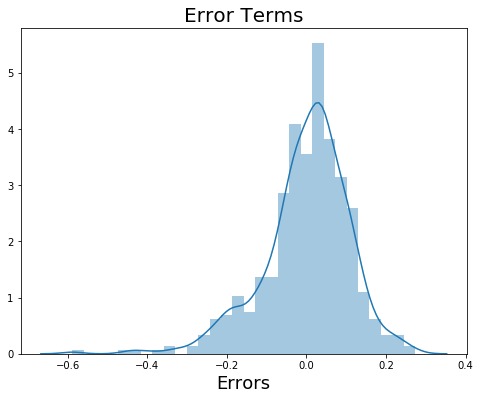

In [1408]:
res = y_train - y_train_pred

plt.figure(figsize=[8, 6])
sns.distplot(res)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  
plt.show()

In [1409]:
mean_residuals = np.mean(res)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 4.2014322304442197e-16


<Figure size 576x432 with 0 Axes>

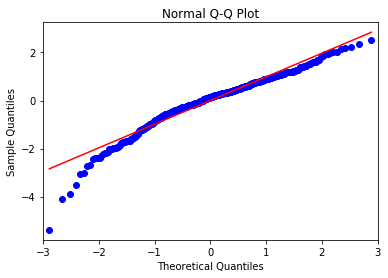

In [1410]:
# Determining if two data sets come from populations with a common distribution.

plt.figure(figsize=[8, 6])
sm.qqplot(res, fit = True, line = 'r')
plt.title('Normal Q-Q Plot')
plt.show()

### Inferences: 

- we can see the distribution of all points lies in between theoretical quantiles of -3 to 3
- we have sample quantiles in between -4 to 2.
- Here linearity of the points suggests that the data are normally distributed.

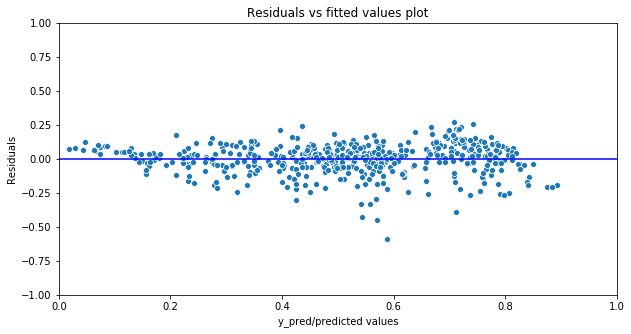

In [1426]:
# Plotting Residuals vs fitted values 

plt.figure(figsize=(10,5))
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-1,1)
plt.xlim(0,1)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot')

## 7. Making Predictions Using the final model

In [1413]:
# Applying the scaling on the test sets

num_vars = ['temp', 'feeling_temp', 'humidity', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [1414]:
df_test.describe()

,cnt,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.522154,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.231818,0.259091,0.263636,0.263636,0.245455,0.231818,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.219163,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.422956,0.439135,0.441609,0.441609,0.431338,0.422956,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.048205,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.378595,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.524678,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.677750,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.963300,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 7.1 Defining X_test and y_test

In [1415]:
# defining y_test and removing target variables from y_test

y_test = df_test.pop('cnt')

y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [1416]:
# Defining X_test

X_test = df_test

X_test.head()

,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1417]:
# Adding constant variable to test dataframe

X_test_m20 = sm.add_constant(X_test)
X_test_m20.head()

,const,year,holiday,workingday,temp,feeling_temp,humidity,windspeed,spring,summer,winter,Heavy_Rain,Light_snow,Mist,Mon,Sat,Sun,Thus,Tues,Wed,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [1418]:
# Creating X_test_m20 dataframe by dropping variables from X_test_m20

X_test_m20 = X_test_m20.drop(['feeling_temp','humidity','workingday','spring','summer','winter','Heavy_Rain',
                              'Mon','Sat','Sun','Thus','Tues','Wed','Feb','Jan','Jul','May',
                              'Nov','Oct','Sep'], axis = 1)
X_test_m20.head()

,const,year,holiday,temp,windspeed,Light_snow,Mist,Aug,Dec,Jun,Mar
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,1,0
299,1.0,0,0,0.511964,0.334206,1,0,0,0,0,0
221,1.0,0,0,0.881625,0.339570,0,0,1,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,1,0


In [1419]:
# Making predictions using the 20th model

y_pred_m20 = lr_20.predict(X_test_m20)
y_pred_m20.head()

184    0.431829
535    0.871181
299    0.433553
221    0.552723
152    0.513909
dtype: float64

<Figure size 720x720 with 0 Axes>

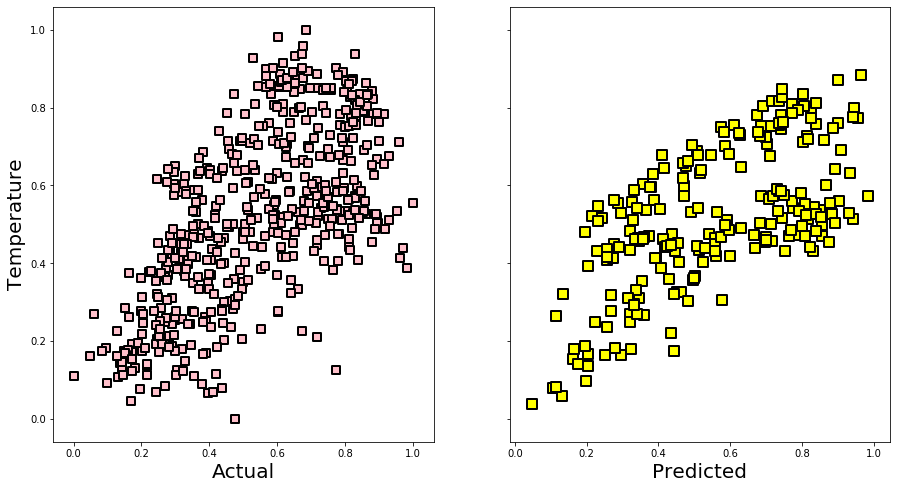

In [1425]:
# Plotting Actual_Temp vs. Predictor_temp 

plt.figure(figsize=[10, 10])
f, axes = plt.subplots(1, 2, sharey=True, figsize = [15,8])

actual = axes[0].scatter(X_train_sm.iloc[:,3].values, y_train, c ="pink",  
            linewidths = 2,  
            marker ="s",  
            edgecolor ="Black",  
            s = 50) 

axes[0].set_ylabel("Temperature", fontsize = 20)
axes[0].set_xlabel("Actual", fontsize = 20)

predicted= axes[1].scatter(X_test_m20.iloc[:,3].values, y_pred_m20, c ="yellow", 
            linewidths = 2, 
            marker ="s",  
            edgecolor ="Black",  
            s = 100) 

axes[1].set_xlabel("Predicted", fontsize = 20)

plt.show() 

## 8. Model Evaluation

In [1421]:
# Importing sklearn library for r2_score

from sklearn.metrics import r2_score

In [1422]:
# Calculating r2_score for y_test & y_test_pred

r2_score(y_true = y_test, y_pred = y_pred_m20)

0.735822896695119

### Inferences:

- We have r2_score as 0.736 i.e. 73.6% &
- r2_score from 20th model as 0.762 i.e. 76.2%
- Adj. r2_score from 20th model as 0.758 i.e. 75.8%

### 8.1 Plotting y_test Vs y_pred_m20

Text(0, 0.5, 'y_pred_m20')

<Figure size 432x288 with 0 Axes>

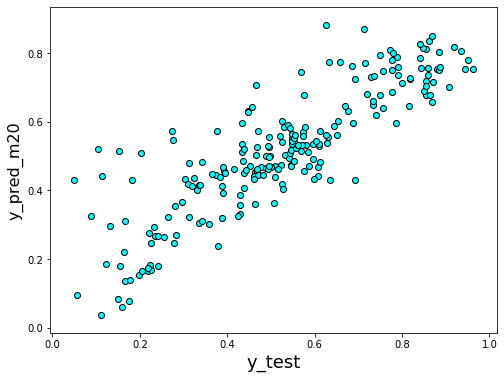

In [1423]:
fig = plt.figure()
plt.figure(figsize=[8, 6])
plt.scatter(y_test, y_pred_m20, color= 'cyan', edgecolor = 'Black')
fig.suptitle('y_test vs y_pred_m20', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred_m20', fontsize = 16)


We can see that the equation of our best fitted line is:

$ Count = 0.0974 + (0.2403\times  year - 0.0814\times  holiday + 0.5192\times temp - 0.1911\times windspeed + 0.1342\times Light_snow + 0.1106\times Mist + 0.0624\times August + 0.0869\times December + 0.0948\times June - 0.0480\times March) $
